In [1]:
import os
print("LD_LIBRARY_PATH =", os.environ.get("LD_LIBRARY_PATH"))

LD_LIBRARY_PATH = /home/dawon/miniconda3/lib:/usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/envs/tf_gpu_env/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/usr/local/cuda/lib64:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib:/home/dawon/miniconda3/lib::/home/dawon/miniconda3/lib/:/home/dawon/miniconda3/lib/:/home/dawon/miniconda3/lib/:/home/dawon/miniconda3/lib/


In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

2025-05-18 17:25:05.041881: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 17:25:05.085422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 17:25:05.565378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/dawon/miniconda3/envs/tf_gpu_env/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normal

Num GPUs Available: 1


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
os.makedirs("checkpoints", exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Î∞è Ï†ïÍ∑úÌôî
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±Í∏∞
train_generator = datagen.flow_from_directory(
    "./price_patterns",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±Í∏∞
validation_generator = datagen.flow_from_directory(
    "./price_patterns",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# CNN Î™®Îç∏ Íµ¨ÏÑ±
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ÏΩúÎ∞±: Ï°∞Í∏∞ Ï¢ÖÎ£å
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ÏΩúÎ∞±: Ï§ëÍ∞Ñ Ï†ÄÏû•
checkpoint = ModelCheckpoint(
    filepath="checkpoints/pattern_model_epoch{epoch:02d}_valacc{val_accuracy:.4f}.h5",
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

# ÏµúÏ¢Ö Î™®Îç∏ Ï†ÄÏû•
model.save("pattern_classification_model.h5")
print("Ìå®ÌÑ¥ Î∂ÑÎ•ò Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å Î∞è Ï†ÄÏû•!")

Found 445619 images belonging to 2 classes.
Found 111404 images belonging to 2 classes.


2025-05-18 17:25:13.687662: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46448 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:17:00.0, compute capability: 8.9


Epoch 1/10


2025-05-18 17:25:14.387750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-05-18 17:25:16.364614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800
2025-05-18 17:25:17.382214: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-18 17:25:17.905766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-05-18 17:25:18.265767: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x2213a4c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-18 17:25:18.265795: I tensorflow/co

13926/13926 [==============================] - ETA: 0s - loss: 0.5164 - accuracy: 0.7418      

2025-05-18 18:05:15.715143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.80020, saving model to checkpoints/pattern_model_epoch01_valacc0.8002.h5
13926/13926 [==============================] - 3000s 215ms/step - loss: 0.5164 - accuracy: 0.7418 - val_loss: 0.4308 - val_accuracy: 0.8002
Epoch 2/10
13926/13926 [==============================] - ETA: 0s - loss: 0.4171 - accuracy: 0.8017   
Epoch 2: val_accuracy improved from 0.80020 to 0.81490, saving model to checkpoints/pattern_model_epoch02_valacc0.8149.h5
13926/13926 [==============================] - 3008s 216ms/step - loss: 0.4171 - accuracy: 0.8017 - val_loss: 0.3917 - val_accuracy: 0.8149
Epoch 3/10
13926/13926 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8134   
Epoch 3: val_accuracy improved from 0.81490 to 0.82072, saving model to checkpoints/pattern_model_epoch03_valacc0.8207.h5
13926/13926 [==============================] - 3009s 216ms/step - loss: 0.3926 - accuracy: 0.8134 - val_loss: 0.3707 - val_accuracy: 0.8207
Epoch 4/10

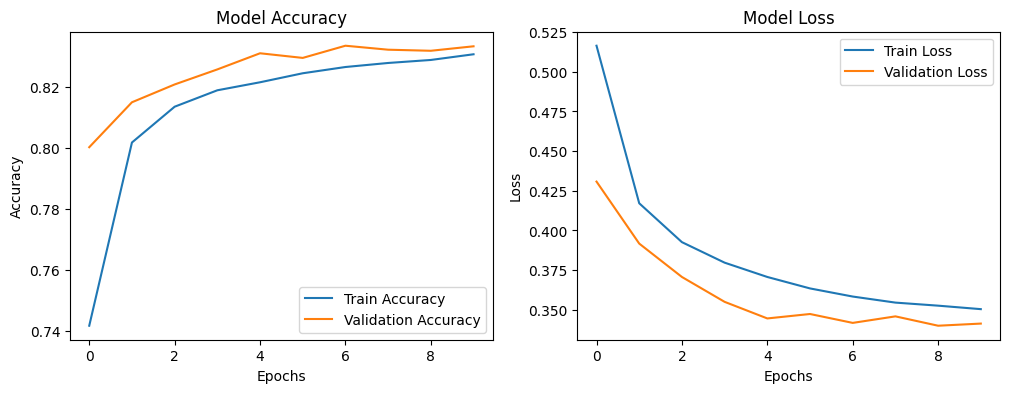

In [5]:
import matplotlib.pyplot as plt

# ÌïôÏäµ Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))

# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ÏÜêÏã§(loss) Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [6]:
# ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
import tensorflow as tf

model = tf.keras.models.load_model("pattern_classification_model.h5")

# Î™®Îç∏ ÌèâÍ∞Ä (Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã)
loss, accuracy = model.evaluate(validation_generator)

print(f"Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º")
print(f"ÏÜêÏã§(loss): {loss:.4f}")
print(f"Ï†ïÌôïÎèÑ(accuracy): {accuracy:.4f}")

2025-05-19 01:47:36.609863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3482/3482 [==============================] - 602s 173ms/step - loss: 0.3408 - accuracy: 0.8338
Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º
ÏÜêÏã§(loss): 0.3408
Ï†ïÌôïÎèÑ(accuracy): 0.8338


1/1 [==============================] - 0s 42ms/step


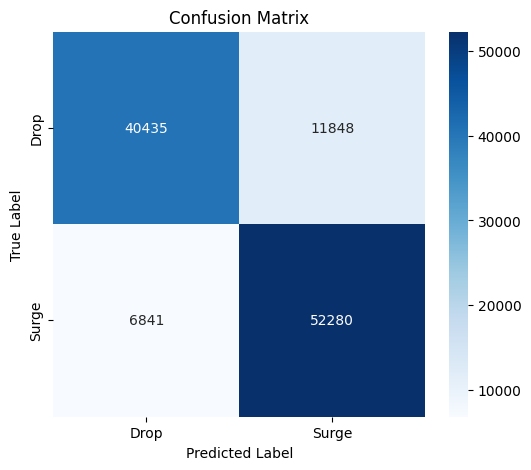

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ïã§Ï†ú Î†àÏù¥Î∏îÍ≥º ÏòàÏ∏°Í∞í ÏàòÏßë
true_labels = []
pred_labels = []

for _ in range(len(validation_generator)):
    x, y = validation_generator.__next__()
    preds = model.predict(x)
    true_labels.extend(y)  # Ïã§Ï†ú Ï†ïÎãµ
    pred_labels.extend((preds > 0.5).astype(int).flatten())  # 0.5 Ïù¥ÏÉÅÏù¥Î©¥ ÏÉÅÏäπ(1), ÏïÑÎãàÎ©¥ ÌïòÎùΩ(0)

# ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(true_labels, pred_labels)

# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Drop', 'Surge'], yticklabels=['Drop', 'Surge'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


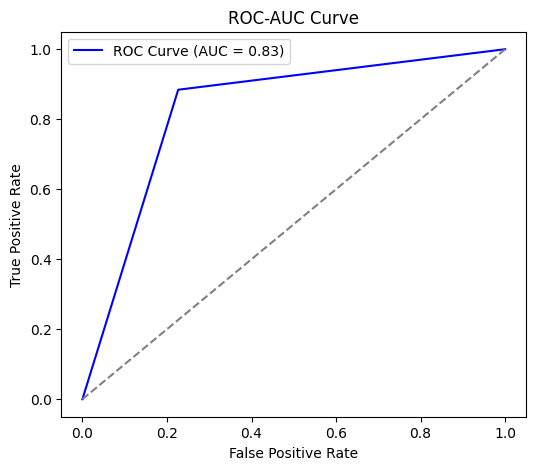

In [10]:
from sklearn.metrics import roc_curve, auc

# ROC Curve Í≥ÑÏÇ∞
fpr, tpr, _ = roc_curve(true_labels, pred_labels)
roc_auc = auc(fpr, tpr)

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ÎûúÎç§ ÏòàÏ∏° Í∏∞Ï§ÄÏÑ†
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [ ]:
# ÏµúÍ∑º 1ÎÖÑ Í∞Ñ ÏÉÅÏäπÌå®ÌÑ¥ Ïù¥ÎØ∏ÏßÄ Ïù¥Ïö© ÌÖåÏä§Ìä∏ (Ïù¥Í≤å ÌÖåÏä§Ìä∏ÏÖã)

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv

# ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = tf.keras.models.load_model("pattern_classification_model.h5")

# ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî (ÏµúÍ∑º 1ÎÖÑ ÏÉÅÏäπ Ìå®ÌÑ¥)
test_dir = "./data/price_1percent_surge_patterns_test"

# ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï (ÏµúÏ†Å ÏÜçÎèÑÎ•º ÏúÑÌï¥ Ìïú Î≤àÏóê Ïó¨Îü¨ Í∞ú Ï≤òÎ¶¨)
batch_size = 32
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# ÏòàÏ∏° ÏàòÌñâ (Î∞∞Ïπò Îã®ÏúÑ)
success = 0
fail = 0
predictions = []

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Ï†ïÍ∑úÌôî
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)  # numpy Î∞∞Ïó¥ Î≥ÄÌôò (Î∞∞Ïπò ÏûÖÎ†•)

    # Î™®Îç∏ ÏòàÏ∏°
    batch_preds = model.predict(batch_images)

    for img_name, pred in zip(batch_names, batch_preds):
        result = "surge_pattern" if pred[0] > 0.5 else "drop_pattern"
        success += 1 if pred[0] > 0.5 else 0
        fail += 1 if pred[0] <= 0.5 else 0
        predictions.append([img_name, result])

# ÏµúÏ¢Ö ÏÑ±Í≥µ & Ïã§Ìå® Í∞úÏàò Ï∂úÎ†•
print(f"success: {success}, fail: {fail}")

# CSV ÌååÏùºÎ°ú ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
output_csv = "surge_pattern_test_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])  # Ìó§Îçî Ï∂îÍ∞Ä
    writer.writerows(predictions)

print(f"ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä {output_csv} ÌååÏùºÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 744ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 721ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 927ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 574ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 731ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 705ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 652ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 652ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 662ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 745ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 622ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 601ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [5]:
import pandas as pd

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("surge_pattern_test_results.csv")

# ÏòàÏ∏°Îêú ÏÉÅÏäπ/ÌïòÎùΩ Ìå®ÌÑ¥ Í∞úÏàò Ï∂úÎ†•
print(df["Prediction"].value_counts())

# ÏûòÎ™ª ÏòàÏ∏°Îêú Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
incorrect_preds = df[df["Prediction"] == "drop_pattern"]
print("ÏÉÅÏäπ Ìå®ÌÑ¥Ïù∏Îç∞ ÌïòÎùΩÏúºÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÎØ∏ÏßÄÎì§:")
print(incorrect_preds)

Prediction
surge_pattern    25730
drop_pattern      4490
Name: count, dtype: int64
ÏÉÅÏäπ Ìå®ÌÑ¥Ïù∏Îç∞ ÌïòÎùΩÏúºÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÎØ∏ÏßÄÎì§:
                     Image    Prediction
2      AAPL_2024-04-29.png  drop_pattern
3      AAPL_2024-05-02.png  drop_pattern
6      AAPL_2024-05-14.png  drop_pattern
8      AAPL_2024-05-28.png  drop_pattern
13     AAPL_2024-06-26.png  drop_pattern
...                    ...           ...
30176   ZTS_2024-05-16.png  drop_pattern
30177   ZTS_2024-06-05.png  drop_pattern
30180   ZTS_2024-06-24.png  drop_pattern
30186   ZTS_2024-08-06.png  drop_pattern
30203   ZTS_2025-01-02.png  drop_pattern

[4490 rows x 2 columns]


In [7]:
# ÏµúÍ∑º 1ÎÖÑ Í∞Ñ ÌïòÎùΩÌå®ÌÑ¥ Ïù¥ÎØ∏ÏßÄ Ïù¥Ïö© ÌÖåÏä§Ìä∏

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv

# ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = tf.keras.models.load_model("pattern_classification_model.h5")

# ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî (ÏµúÍ∑º 1ÎÖÑ ÏÉÅÏäπ Ìå®ÌÑ¥)
test_dir = "./data/price_1percent_drop_patterns_test"

# ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï (ÏµúÏ†Å ÏÜçÎèÑÎ•º ÏúÑÌï¥ Ìïú Î≤àÏóê Ïó¨Îü¨ Í∞ú Ï≤òÎ¶¨)
batch_size = 32  
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# ÏòàÏ∏° ÏàòÌñâ (Î∞∞Ïπò Îã®ÏúÑ)
success = 0
fail = 0
predictions = []

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Ï†ïÍ∑úÌôî
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)  # numpy Î∞∞Ïó¥ Î≥ÄÌôò (Î∞∞Ïπò ÏûÖÎ†•)

    # Î™®Îç∏ ÏòàÏ∏°
    batch_preds = model.predict(batch_images)

    for img_name, pred in zip(batch_names, batch_preds):
        result = "surge_pattern" if pred[0] > 0.5 else "drop_pattern"
        success += 1 if pred[0] < 0.5 else 0
        fail += 1 if pred[0] >= 0.5 else 0
        predictions.append([img_name, result])

# ÏµúÏ¢Ö ÏÑ±Í≥µ & Ïã§Ìå® Í∞úÏàò Ï∂úÎ†•
print(f"success: {success}, fail: {fail}")

# CSV ÌååÏùºÎ°ú ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
output_csv = "drop_pattern_test_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])  # Ìó§Îçî Ï∂îÍ∞Ä
    writer.writerows(predictions)

print(f"ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä {output_csv} ÌååÏùºÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 646ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 616ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 791ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 627ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 798ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 817ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 660ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 634ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 640ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 646ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [13]:
import pandas as pd

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("drop_pattern_test_results.csv")

# ÏòàÏ∏°Îêú ÏÉÅÏäπ/ÌïòÎùΩ Ìå®ÌÑ¥ Í∞úÏàò Ï∂úÎ†•
print(df["Prediction"].value_counts())

# ÏûòÎ™ª ÏòàÏ∏°Îêú Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
incorrect_preds = df[df["Prediction"] == "surge_pattern"]
print("ÌïòÎùΩ Ìå®ÌÑ¥Ïù∏Îç∞ ÏÉÅÏäπÏúºÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÎØ∏ÏßÄÎì§:")
print(incorrect_preds)

Prediction
drop_pattern     25750
surge_pattern     2361
Name: count, dtype: int64
ÌïòÎùΩ Ìå®ÌÑ¥Ïù∏Îç∞ ÏÉÅÏäπÏúºÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÎØ∏ÏßÄÎì§:
                     Image     Prediction
44     AAPL_2025-03-11.png  surge_pattern
70     ABBV_2024-10-02.png  surge_pattern
96     ABNB_2024-04-10.png  surge_pattern
97     ABNB_2024-04-16.png  surge_pattern
115    ABNB_2024-08-07.png  surge_pattern
...                    ...            ...
28042  ZBRA_2025-01-23.png  surge_pattern
28051  ZBRA_2025-02-13.png  surge_pattern
28087   ZTS_2024-11-04.png  surge_pattern
28088   ZTS_2024-11-05.png  surge_pattern
28092   ZTS_2024-12-04.png  surge_pattern

[2361 rows x 2 columns]


ÏÉÅÏäπ Ìå®ÌÑ¥: 0Í∞ú
ÌïòÎùΩ Ìå®ÌÑ¥: 0Í∞ú
ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä 'today_results.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!


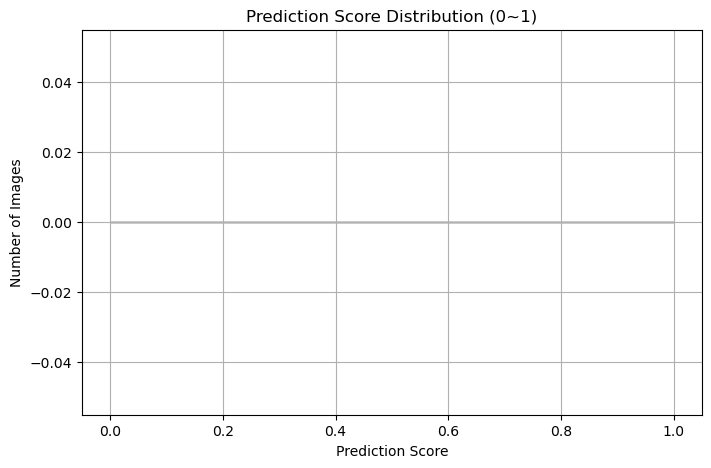

In [15]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv
import matplotlib.pyplot as plt

# ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = tf.keras.models.load_model("pattern_classification_model.h5")

# ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî (Ïò§Îäò Îç∞Ïù¥ÌÑ∞)
test_dir = "./data/recent"

# Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï
batch_size = 32  
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# ÏòàÏ∏° ÏàòÌñâ
surge = 0
drop = 0
predictions = []
prediction_scores = []  # ÏòàÏ∏° Ï†êÏàò Ï†ÄÏû•Ïö©

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0  # Ï†ïÍ∑úÌôî
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)

    # Î™®Îç∏ ÏòàÏ∏°
    batch_preds = model.predict(batch_images, verbose=0)

    for img_name, pred in zip(batch_names, batch_preds):
        score = pred[0]
        result = "surge_pattern" if score > 0.5 else "drop_pattern"
        surge += 1 if score > 0.5 else 0
        drop += 1 if score <= 0.5 else 0
        predictions.append([img_name, result])
        prediction_scores.append(score)  # Ï†êÏàò Ï†ÄÏû•

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ÏÉÅÏäπ Ìå®ÌÑ¥: {surge}Í∞ú")
print(f"ÌïòÎùΩ Ìå®ÌÑ¥: {drop}Í∞ú")

# CSV Ï†ÄÏû•
output_csv = "today_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])
    writer.writerows(predictions)

print(f"ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä '{output_csv}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

#ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(prediction_scores, bins=50, color='skyblue', edgecolor='black')
plt.title("Prediction Score Distribution (0~1)")
plt.xlabel("Prediction Score")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tqdm import tqdm

# ‚úÖ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = load_model("pattern_classification_model.h5")

# ‚úÖ ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú
test_dir = "./data/test_patterns"

# ‚úÖ Ïù¥ÎØ∏ÏßÄ Î™©Î°ù Î∂àÎü¨Ïò§Í∏∞
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# ‚úÖ ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
prediction_scores = []

# ‚úÖ tqdmÏúºÎ°ú ÏòàÏ∏° ÏßÑÌñâ ÏÉÅÌô© ÌëúÏãú
for img_file in tqdm(image_files, desc="ÏòàÏ∏° ÏßÑÌñâ Ï§ë"):
    img_path = os.path.join(test_dir, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model.predict(img_array, verbose=0)
    prediction_scores.append(pred[0][0])

# ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.hist(prediction_scores, bins=50, color='skyblue', edgecolor='black')
plt.title("Prediction Score Distribution (0~1)")
plt.xlabel("Prediction Score")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 318ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 186.2 kB/s eta 0:03:32
   ---------------------------------------- 0.0/39.5 MB 163.4 kB/s eta 0:04:02
   ---------------------------------------- 0.1/39.5 MB 217.9 kB/s eta 0:03:01
   ---------------------------------------- 0.1/39.5 MB 308.0 kB/s eta 0:02:08
   ---------------------------------------- 0.1/39.5 MB 343.4 kB/s eta 0:01:55
   ---------------------------------------- 0.2/39.5 MB 382.3 kB/s eta 0:01:43
   ---------------------------------

Functional Î™®Îç∏ Ïû¨Íµ¨ÏÑ± ÏôÑÎ£å
 ÎßàÏßÄÎßâ Conv Î†àÏù¥Ïñ¥: conv2d_17
üìä ÏòàÏ∏° score: 0.3577
ÌïòÎùΩ Ìå®ÌÑ¥ÏúºÎ°ú Î∂ÑÎ•òÎêòÏóàÏäµÎãàÎã§!


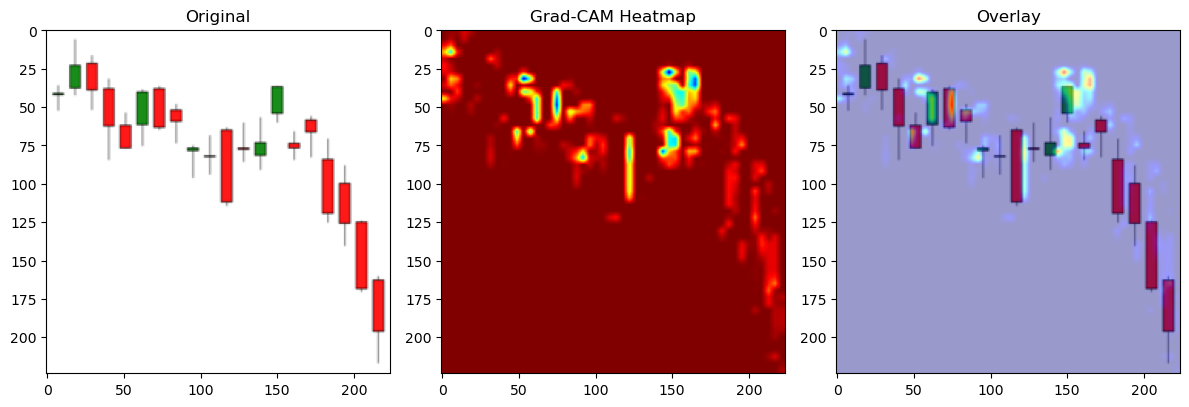

In [29]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ÌïôÏäµÎêú Sequential Î™®Îç∏ Î°úÎìú
seq_model = tf.keras.models.load_model("pattern_classification_model.h5")

# Functional Î™®Îç∏Î°ú Î≥ÄÌôò (Í∞ÄÏ§ëÏπò Î≥µÏÇ¨ Ìè¨Ìï®)
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs
for layer in seq_model.layers:
    cloned_layer = tf.keras.models.clone_model(layer)
    cloned_layer.set_weights(layer.get_weights())  # Í∞ÄÏ§ëÏπò Î≥µÏÇ¨!
    x = cloned_layer(x)
functional_model = tf.keras.Model(inputs=inputs, outputs=x)
print("Functional Î™®Îç∏ Ïû¨Íµ¨ÏÑ± ÏôÑÎ£å")

# ÎßàÏßÄÎßâ Conv Î†àÏù¥Ïñ¥ ÌÉêÏÉâ
last_conv_layer_name = next(
    layer.name for layer in reversed(functional_model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)
print(f" ÎßàÏßÄÎßâ Conv Î†àÏù¥Ïñ¥: {last_conv_layer_name}")

# Grad-CAM Ìï®Ïàò
def apply_gradcam(img_path, model, last_conv_layer_name):
    # Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Grad-CAM ÏÑúÎ∏åÎ™®Îç∏ Íµ¨ÏÑ±
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Gradient Í≥ÑÏÇ∞
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array, training=False)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    # ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
    score = predictions[0][0].numpy()
    print(f"üìä ÏòàÏ∏° score: {score:.4f}")
    if score > 0.5:
        print("ÏÉÅÏäπ Ìå®ÌÑ¥ÏúºÎ°ú Î∂ÑÎ•òÎêòÏóàÏäµÎãàÎã§!")
    else:
        print("ÌïòÎùΩ Ìå®ÌÑ¥ÏúºÎ°ú Î∂ÑÎ•òÎêòÏóàÏäµÎãàÎã§!")

    # Heatmap Í≥ÑÏÇ∞
    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8  # ÏïàÏ†ïÏÑ± ÌôïÎ≥¥

    # ÏãúÍ∞ÅÌôî
    img_cv = cv2.imread(img_path)
    img_cv = cv2.resize(img_cv, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img_cv, 0.6, heatmap_color, 0.4, 0)

    # Ï∂úÎ†•
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.title("Original")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_color)
    plt.title("Grad-CAM Heatmap")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title("Overlay")

    plt.tight_layout()
    plt.show()

# 5Ô∏è‚É£ Ïã§Ìñâ
test_img_path = "./data/A_2024-04-18.png"  # ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
apply_gradcam(test_img_path, functional_model, last_conv_layer_name)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step


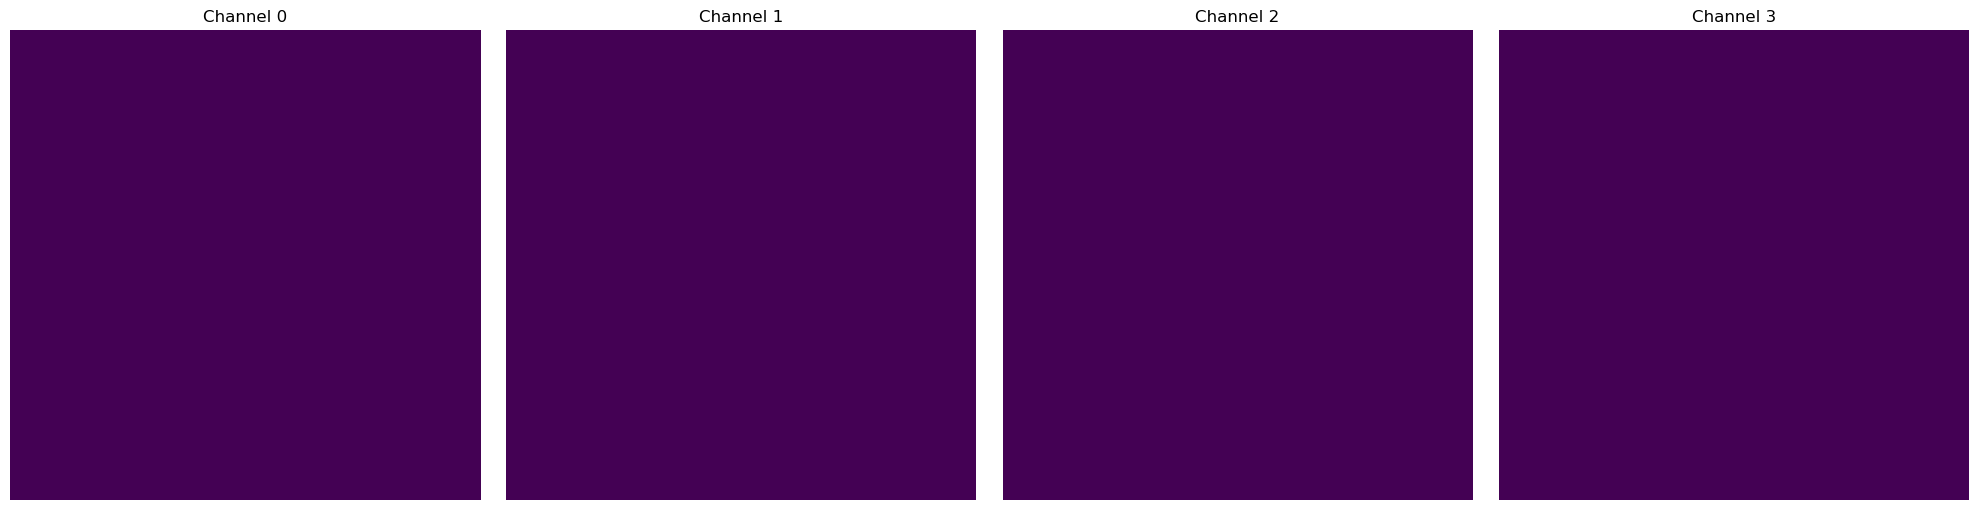

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Î™®Îç∏ Î°úÎìú
model = tf.keras.models.load_model("pattern_classification_model.h5")

# ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
img_path = "./data/A_2024-04-18.png"

# Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ÎßàÏßÄÎßâ Conv Î†àÏù¥Ïñ¥ Ï∞æÍ∏∞
last_conv_layer_name = next(
    layer.name for layer in reversed(model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)

# Ìï¥Îãπ Conv Î†àÏù¥Ïñ¥ Ï∂úÎ†•Îßå Îî∞Î°ú Ï∂îÏ∂úÌïòÎäî Î™®Îç∏
activation_model = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(last_conv_layer_name).output
)

# ÌôúÏÑ±Ìôî Îßµ Ï∂îÏ∂ú
activations = activation_model.predict(img_array)

# ÏïûÏùò 4Í∞ú Ï±ÑÎÑêÎßå ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    ax = axes[i]
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.set_title(f"Channel {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()